 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_df = pd.read_csv(Path('../Resources/whale_returns.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()

In [5]:
whale_df.sort_index(inplace = True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_df = pd.read_csv(Path('../Resources/algo_returns.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df = algo_df.dropna()

In [9]:
algo_df.sort_index(inplace = True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
snp500_df = pd.read_csv(Path('../Resources/sp500_history.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
snp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types
snp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [12]:
# Fix Data Types
snp500_df['Close'] = snp500_df['Close'].str.replace('$', '')
snp500_df = snp500_df.astype({'Close': float})
snp500_df.head()
#

C:\Users\tjmcd\AppData\Local\Temp/ipykernel_14720/3102172345.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  snp500_df['Close'] = snp500_df['Close'].str.replace('$', '')


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
snp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [14]:
# Calculate Daily Returns
snp500_df_dr = snp500_df.pct_change()

In [15]:
# Drop nulls
snp500_df_dr.dropna()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [16]:
# Rename `Close` Column to be specific to this portfolio.
snp500_df_dr = snp500_df_dr.rename(columns={'Close':'SNP500'})
snp500_df_dr.sort_index(inplace = True)
snp500_df_dr

,SNP500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469
...,...
2019-04-16,0.002279
2019-04-17,-0.001577
2019-04-18,-0.001011


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([snp500_df_dr, algo_df, whale_df], axis="columns", join="inner")
combined_df = combined_df.dropna()
combined_df = combined_df.rename(columns={'SOROS FUND MANAGEMENT LLC':'SOROS'})
combined_df.shape

(1042, 7)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

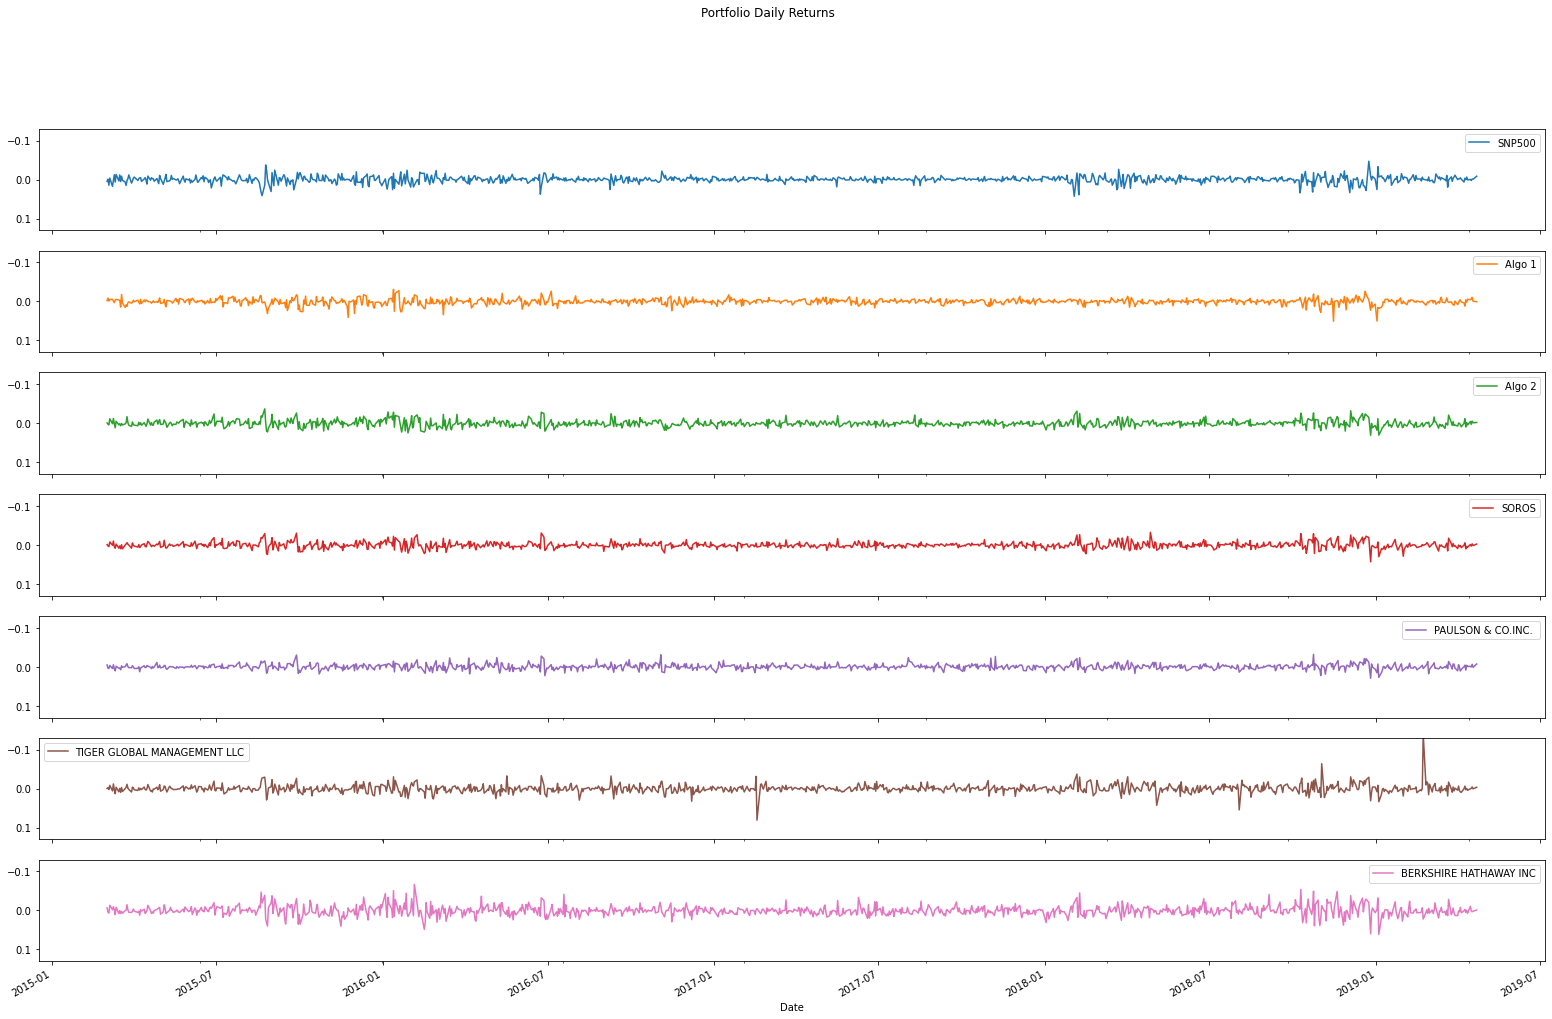

In [18]:
# Plot daily returns of all portfolios
combined_df.plot(kind = 'line', figsize = (27, 17), subplots = True, ylim = (.13,-.13), title = 'Portfolio Daily Returns')

#### Calculate and Plot cumulative returns.

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

,SNP500,Algo 1,Algo 2,SOROS,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,1.004408,0.998058,0.999051,0.998734,0.995019,0.999504,0.993431
2015-03-04,1.003208,0.989486,1.001464,1.000962,0.998245,0.996972,0.997617
2015-03-05,1.017632,0.988541,1.005794,1.004981,1.002314,0.999319,1.004327
2015-03-06,1.013634,0.983641,0.994267,0.997037,0.998731,0.990844,0.991172
2015-03-09,1.031123,0.978283,0.995563,0.997617,1.002951,0.996633,0.989534


<AxesSubplot:title={'center':'Cumulative Portfolio Returns Comparison'}, xlabel='Date'>

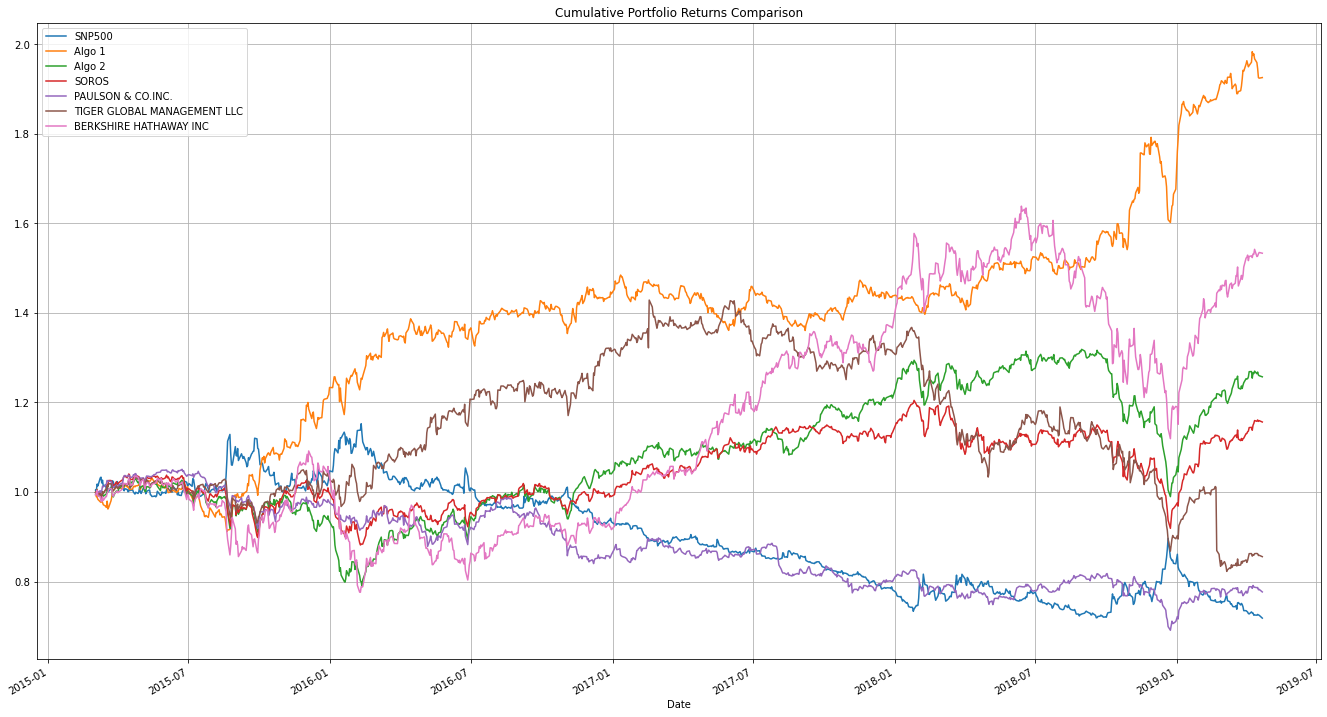

In [20]:
# Plot cumulative returns
cumulative_returns.plot(kind= 'line', figsize = (23,13), title = "Cumulative Portfolio Returns Comparison", grid = True)

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

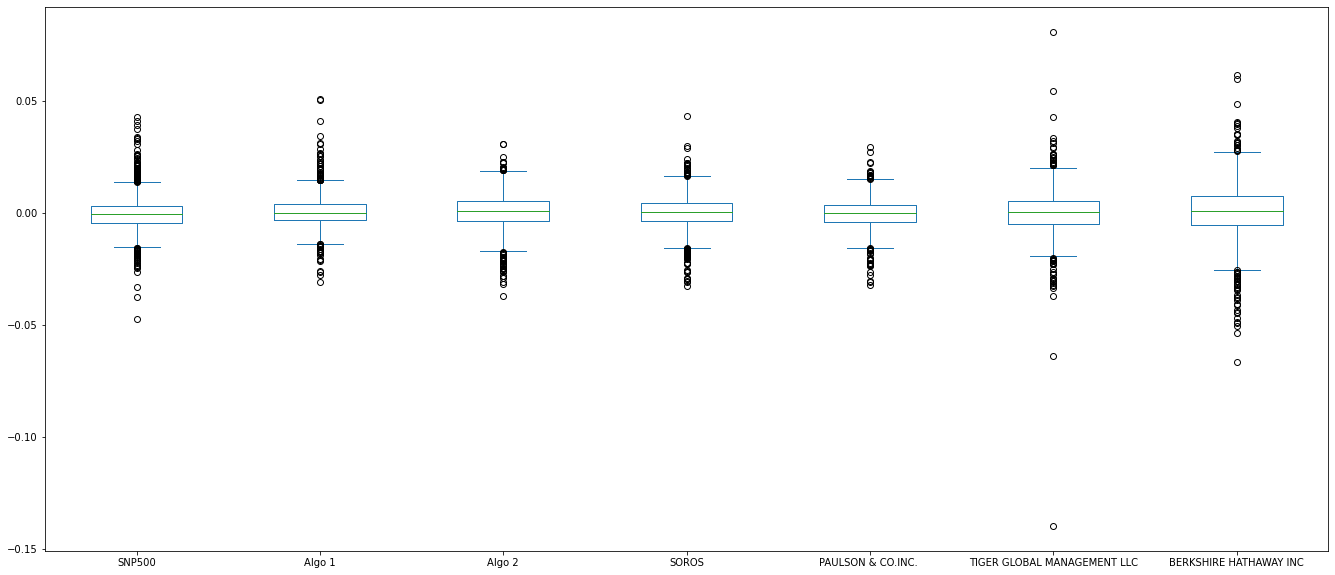

In [21]:
# Box plot to visually show risk
combined_df.plot(kind = 'box', figsize = (23, 10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std

SNP500                         0.008587
Algo 1                         0.007623
Algo 2                         0.008341
SOROS                          0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate the daily standard deviation of S&P 500
snp500_std = snp500_df_dr.dropna().std()
snp500_std

SNP500    0.008135
dtype: float64

In [24]:
# Determine which portfolios are riskier than the S&P 500
risky_ports = combined_std.ge(snp500_std, level='SNP500', fill_value= snp500_std['SNP500'])
risky_ports = risky_ports.to_frame()
risky_ports.drop(index='SNP500', inplace = True)
risky_ports = risky_ports.rename(columns={0:'Riskier?'})
risky_ports

,Riskier?
Algo 1,False
Algo 2,True
BERKSHIRE HATHAWAY INC,True
PAULSON & CO.INC.,False
SOROS,False
TIGER GLOBAL MANAGEMENT LLC,True


In [25]:
#Statement highlighting riskier portfolios
print(f"Porfolios with higher risk than S&P 500: {risky_ports.index[risky_ports['Riskier?']==True].tolist()}")

Porfolios with higher risk than S&P 500: ['Algo 2', 'BERKSHIRE HATHAWAY INC', 'TIGER GLOBAL MANAGEMENT LLC']


### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_std*np.sqrt(252)
annual_std

SNP500                         0.136313
Algo 1                         0.121006
Algo 2                         0.132413
SOROS                          0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
STD21 = combined_df.rolling(window=21).std().dropna()
STD21

,SNP500,Algo 1,Algo 2,SOROS,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-31,0.009106,0.007866,0.006867,0.005764,0.004641,0.006731,0.007108
2015-04-01,0.009128,0.007886,0.006894,0.005744,0.004467,0.006750,0.007005
2015-04-02,0.009260,0.007601,0.006955,0.005749,0.004502,0.006739,0.006958
2015-04-06,0.008711,0.007648,0.007028,0.005792,0.004492,0.006786,0.006884
2015-04-07,0.008687,0.007531,0.006530,0.005452,0.004385,0.006486,0.006193
...,...,...,...,...,...,...,...
2019-04-15,0.006532,0.005496,0.007572,0.006804,0.006225,0.007525,0.009729
2019-04-16,0.006571,0.005760,0.007053,0.006711,0.006224,0.007532,0.009731
2019-04-17,0.006505,0.006229,0.007165,0.006773,0.006370,0.007574,0.009485


<AxesSubplot:xlabel='Date'>

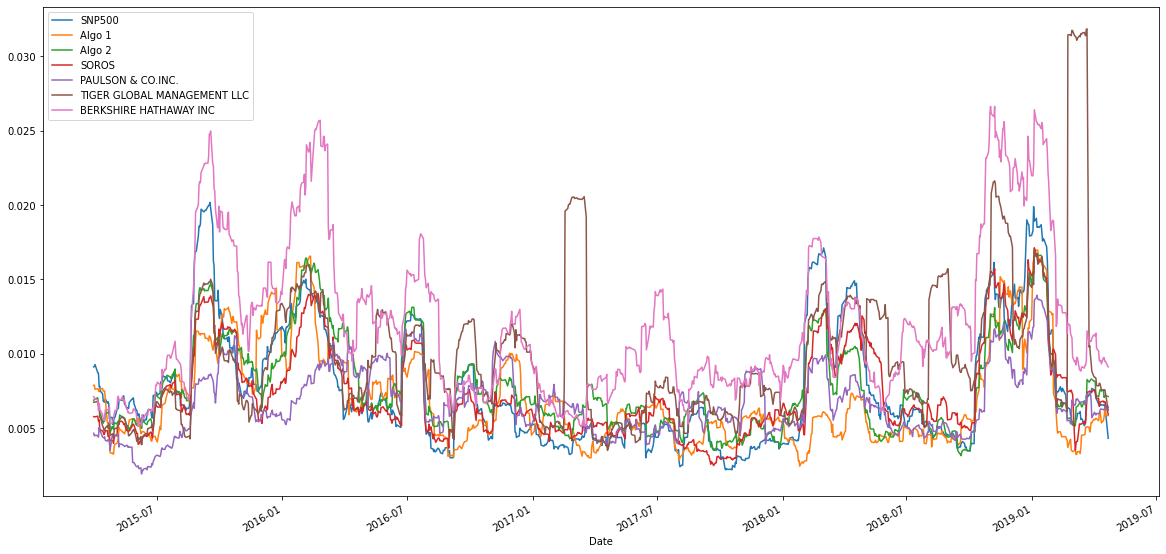

In [28]:
# Plot the rolling standard deviation
STD21.plot(figsize = (20,10))

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
price_correlation = combined_df.corr()

# Display de correlation matrix
price_correlation

,SNP500,Algo 1,Algo 2,SOROS,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SNP500,1.000000,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856
Algo 1,-0.033963,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678
Algo 2,-0.002192,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756
SOROS,0.000574,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157
PAULSON & CO.INC.,0.013549,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125
BERKSHIRE HATHAWAY INC,-0.013856,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [30]:
# Calculate covariance of a single portfolio
cov_soros = combined_df['SOROS'].cov(combined_df['SNP500'])
print(f'Covariance between Soros and S&P portfolios is {cov_soros}')

Covariance between Soros and S&P portfolios is 3.8897269830622025e-08


In [31]:
# Calculate variance of S&P 500
SNP500_var = combined_df['SNP500'].var()
print(f"Variance of S&P 500 for this period was {SNP500_var}")

Variance of S&P 500 for this period was 7.373467552840441e-05


In [32]:
# Computing beta
print(f"Soros' portfolio beta for this period was {cov_soros/SNP500_var}")

Soros' portfolio beta for this period was 0.0005275302230853086


<AxesSubplot:title={'center':'30-Day Rolling Beta: SOROS'}, xlabel='Date'>

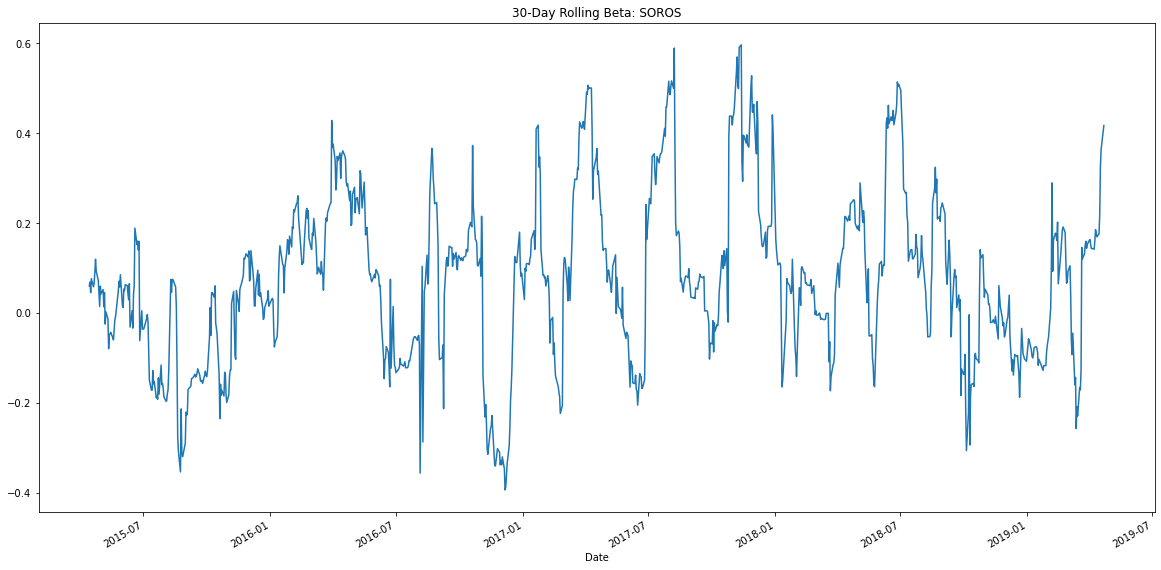

In [33]:
# Plot beta trend
rolling_covariance = combined_df['SOROS'].rolling(window=30).cov(combined_df['SNP500'])
rolling_variance = combined_df['SNP500'].rolling(window=30).var()
rolling_beta = rolling_covariance/rolling_variance
rolling_beta.plot(figsize = (20,10), title = "30-Day Rolling Beta: SOROS")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

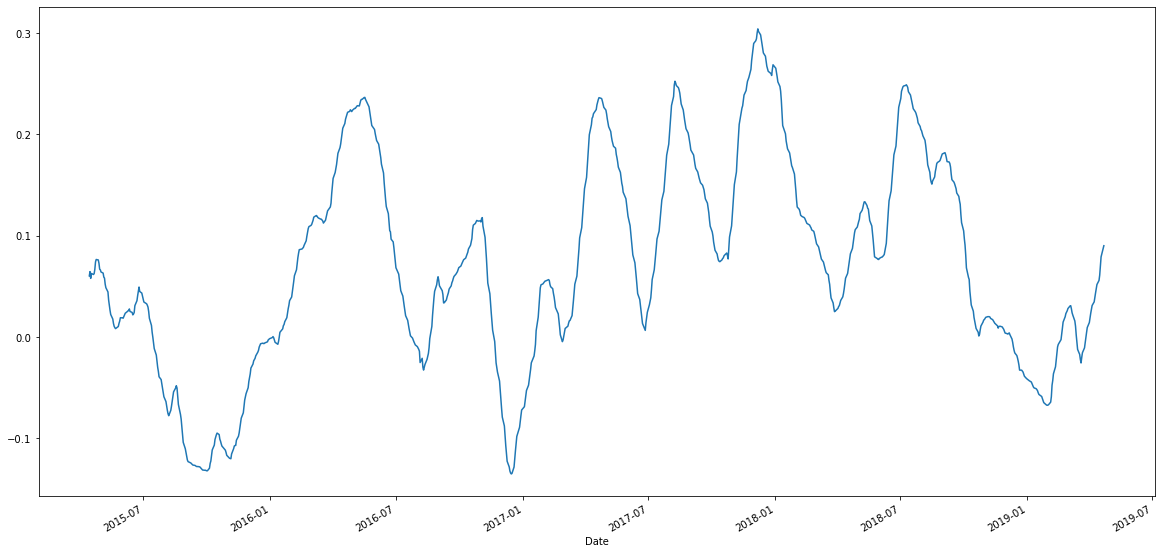

In [34]:
# Use `ewm` to calculate the rolling window
soros_ewm = rolling_beta.ewm(halflife = 21).mean()
soros_ewm.plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
#Add RF Rate to dataframe
risk_free_rate_path= Path("./risk_free_rate.csv")
risk_free_rate = pd.read_csv(risk_free_rate_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
combined_df = pd.concat([combined_df, risk_free_rate], axis='columns', join='inner')
combined_df

,SNP500,Algo 1,Algo 2,SOROS,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,rf_rate
Date,,,,,,,,
2015-03-03,0.004408,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.000002
2015-03-04,-0.001195,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,0.000001
2015-03-05,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.000002
2015-03-06,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,0.000001
2015-03-09,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.000002
...,...,...,...,...,...,...,...,...
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,0.000264
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.000264
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,0.000266


In [36]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_df.mean()-combined_df['rf_rate'].mean())*252 / (combined_df.std() * np.sqrt(252)))
sharpe_ratios

SNP500                        -0.779208
Algo 1                         1.138814
Algo 2                         0.297261
SOROS                          0.190407
PAULSON & CO.INC.             -0.710552
TIGER GLOBAL MANAGEMENT LLC   -0.289643
BERKSHIRE HATHAWAY INC         0.506337
rf_rate                        0.000000
dtype: float64

<AxesSubplot:>

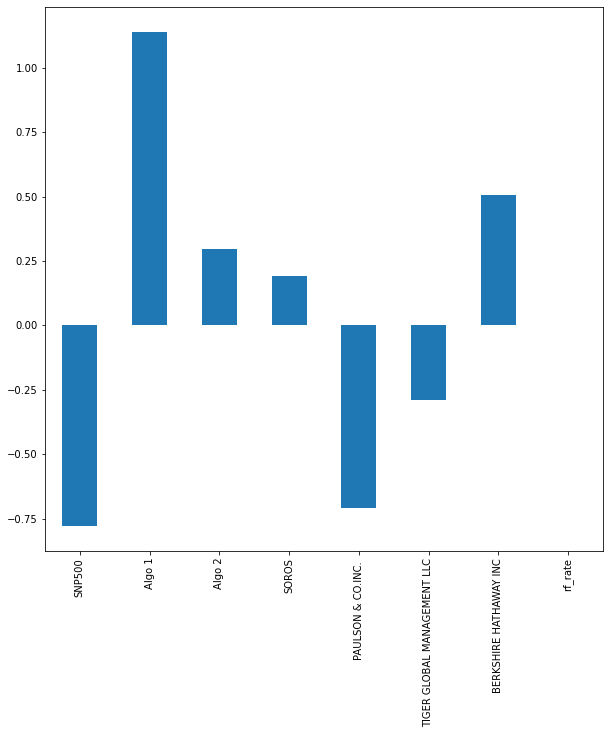

In [37]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', figsize = (10,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [38]:
# Reading data from 1st stock
google_df = pd.read_csv(Path('../Resources/goog_historical.csv'), index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
google_df = google_df.rename(columns={'Symbol':'Goog', 'NOCP':'Google CP'})
google_df.head()

,Goog,Google CP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [39]:
# Reading data from 2nd stock
aapl_df = pd.read_csv(Path('../Resources/aapl_historical.csv'), index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_df = aapl_df.rename(columns={'Symbol':'AAPL', 'NOCP':'APPLE CP'})
aapl_df.head()

,AAPL,APPLE CP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [40]:
# Reading data from 3rd stock
cost_df = pd.read_csv(Path('../Resources/cost_historical.csv'), index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_df = cost_df.rename(columns={'Symbol':'COST', 'NOCP':'Costco CP'})
cost_df.head()

,COST,Costco CP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [41]:
# Combine all stocks in a single DataFrame
custom_combined_df = pd.concat([aapl_df, google_df, cost_df], axis="columns", join="outer")
custom_combined_df = custom_combined_df.dropna()
custom_combined_df.head()

,AAPL,APPLE CP,Goog,Google CP,COST,Costco CP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62


In [42]:
# Reset Date index


In [43]:
# Reorganize portfolio data by having a column per symbol
custom_combined_df = custom_combined_df.drop(columns = ["AAPL","Goog","COST"])
custom_combined_df

,APPLE CP,Google CP,Costco CP
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62
...,...,...,...
2018-05-17,186.99,1078.59,199.60
2018-05-16,188.18,1081.77,198.71
2018-05-15,186.44,1079.23,195.48


In [44]:
# Calculate daily returns
custom_df_dr = custom_combined_df.pct_change()
# Drop NAs
custom_df_dr = custom_df_dr.dropna()
# Display sample data
custom_df_dr

,APPLE CP,Google CP,Costco CP
Trade DATE,,,
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
2019-05-02,-0.012279,-0.019226,-0.007890
...,...,...,...
2018-05-17,0.003650,0.011469,0.003217
2018-05-16,0.006364,0.002948,-0.004459
2018-05-15,-0.009246,-0.002348,-0.016255


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [45]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_port_returns = custom_df_dr.dot(weights)
# Display sample data
custom_port_returns

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
                ...   
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame
all_combined_df = pd.concat([custom_port_returns, combined_df], axis="columns", join="inner")
all_combined_df = all_combined_df.rename(columns={0:'Custom Port'})
all_combined_df = all_combined_df.dropna()
all_combined_df = all_combined_df.drop(index = '2018-05-14')
all_combined_df.head()
all_combined_df.shape

(234, 9)

In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`
comb_std = all_combined_df.std()
comb_std

Custom Port                    0.013489
SNP500                         0.009633
Algo 1                         0.008457
Algo 2                         0.008758
SOROS                          0.009212
PAULSON & CO.INC.              0.007370
TIGER GLOBAL MANAGEMENT LLC    0.014690
BERKSHIRE HATHAWAY INC         0.015574
rf_rate                        0.000022
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [63]:
# Calculate rolling standard deviation
all_std21 = all_combined_df.rolling(window=21).std().dropna()
all_std21.drop(columns='rf_rate', inplace = True)
all_std21

,Custom Port,SNP500,Algo 1,Algo 2,SOROS,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2019-03-22,0.005499,0.004302,0.005831,0.007113,0.005915,0.006400,0.006197,0.009104
2019-03-21,0.006570,0.006137,0.005834,0.007172,0.006633,0.006303,0.007328,0.009475
2019-03-20,0.007467,0.006505,0.006229,0.007165,0.006773,0.006370,0.007574,0.009485
2019-03-19,0.007651,0.006571,0.005760,0.007053,0.006711,0.006224,0.007532,0.009731
2019-03-18,0.007490,0.006532,0.005496,0.007572,0.006804,0.006225,0.007525,0.009729
...,...,...,...,...,...,...,...,...
2018-05-18,0.005613,0.005819,0.004459,0.004799,0.005177,0.004569,0.009449,0.008564
2018-05-17,0.005694,0.005768,0.004644,0.004875,0.005206,0.004564,0.009359,0.008770
2018-05-16,0.005724,0.005741,0.004583,0.004886,0.005469,0.004659,0.009157,0.008457
2018-05-15,0.005943,0.005760,0.004512,0.004550,0.005402,0.004694,0.009156,0.008636


<AxesSubplot:>

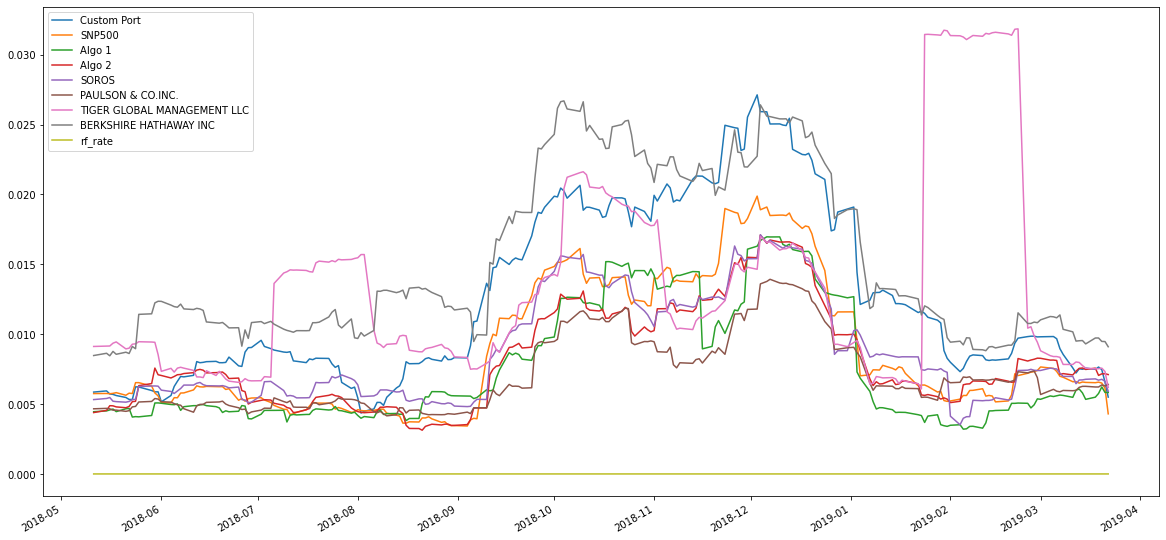

In [50]:
# Plot rolling standard deviation
all_std21.plot(figsize = (20,10))

### Calculate and plot the correlation

In [51]:
# Calculate and plot the correlation
all_corr = all_combined_df.corr()
all_corr

,Custom Port,SNP500,Algo 1,Algo 2,SOROS,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,rf_rate
Custom Port,1.000000,0.869844,0.072135,0.042308,0.065405,0.028032,0.037524,0.008916,0.020214
SNP500,0.869844,1.000000,-0.054697,-0.041612,-0.026426,-0.059018,0.005368,-0.037459,-0.003032
Algo 1,0.072135,-0.054697,1.000000,0.371796,0.345840,0.366600,0.118816,0.331229,0.067526
Algo 2,0.042308,-0.041612,0.371796,1.000000,0.860081,0.782550,0.410731,0.779586,0.016237
SOROS,0.065405,-0.026426,0.345840,0.860081,1.000000,0.789522,0.478737,0.814508,0.036648
PAULSON & CO.INC.,0.028032,-0.059018,0.366600,0.782550,0.789522,1.000000,0.485043,0.647531,-0.045153
TIGER GLOBAL MANAGEMENT LLC,0.037524,0.005368,0.118816,0.410731,0.478737,0.485043,1.000000,0.324880,-0.070351
BERKSHIRE HATHAWAY INC,0.008916,-0.037459,0.331229,0.779586,0.814508,0.647531,0.324880,1.000000,0.067552
rf_rate,0.020214,-0.003032,0.067526,0.016237,0.036648,-0.045153,-0.070351,0.067552,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60-Day Rolling Beta: Custom Port'}, xlabel='Date'>

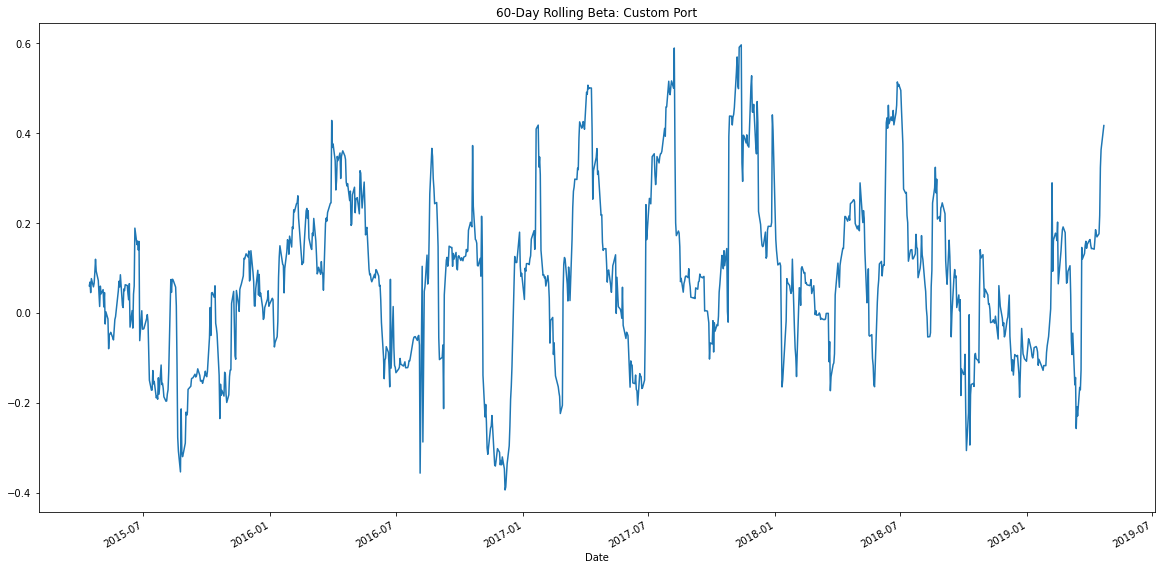

In [52]:
# Calculate and plot Beta
custom_rolling_covariance = all_combined_df['Custom Port'].rolling(window=60).cov(all_combined_df['SNP500'])
custom_rolling_variance = all_combined_df['SNP500'].rolling(window=60).var()
custom_rolling_beta = rolling_covariance/rolling_variance
custom_rolling_beta.plot(figsize = (20,10), title = "60-Day Rolling Beta: Custom Port")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [58]:
#Cumulative Returns
all_cumulative_returns = (1 + all_combined_df).cumprod()-1
all_cumulative_returns.drop(columns='rf_rate', inplace = True)
all_cumulative_returns.head()

,Custom Port,SNP500,Algo 1,Algo 2,SOROS,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2019-04-22,-0.011812,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.012946,-0.009766,0.000088,-0.003163,-0.001142,-0.006120,-0.003061,0.000826
2019-04-17,-0.014467,-0.011327,-0.010214,-0.008374,-0.004035,-0.012547,-0.007457,0.004051
2019-04-16,-0.023484,-0.009074,-0.017087,-0.005499,-0.001346,-0.012164,-0.008282,0.004891
2019-04-15,-0.023802,-0.009578,-0.021345,-0.010046,-0.002767,-0.013306,-0.007887,-0.005653


In [60]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = ((all_combined_df.mean()-all_combined_df['rf_rate'].mean())*252 / (comb_std * np.sqrt(252)))
sharpe_ratios.drop(index='rf_rate', inplace = True)
sharpe_ratios.dropna()

Custom Port                   -0.971450
SNP500                        -0.908258
Algo 1                         1.524239
Algo 2                        -0.281728
SOROS                          0.086578
PAULSON & CO.INC.             -0.193738
TIGER GLOBAL MANAGEMENT LLC   -1.341926
BERKSHIRE HATHAWAY INC        -0.034318
dtype: float64

<AxesSubplot:>

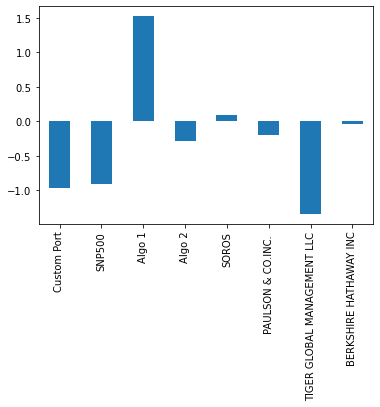

In [61]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### How does your portfolio do?

Write your answer here!